# Simple Web Scrapping using Beautiful Soup on a News webpage

In [7]:
from bs4 import BeautifulSoup
import requests

#### Mandar el HTML request y ver el status
#### Sending the HTML request and the status

In [8]:
html = requests.get("https://www.anmosugoi.com/")
soup = BeautifulSoup(html.text, "html.parser")
html.status_code

200

#### Extraemos las secciones de la barra
#### We extract the secs of the bar

In [9]:
secciones = soup.find("ul", attrs = {"class":"main-menu rb-menu"}).find_all("li")

In [10]:
secciones

[<li class="menu-item menu-item-type-custom menu-item-object-custom current-menu-item current_page_item menu-item-36172" itemprop="name"><a aria-current="page" href="/" itemprop="url"><span>Inicio</span></a></li>,
 <li class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-36744" itemprop="name"><a href="https://www.anmosugoi.com/noticias/anime/" itemprop="url"><span>Anime</span></a></li>,
 <li class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-36745" itemprop="name"><a href="https://www.anmosugoi.com/noticias/manga/" itemprop="url"><span>Manga</span></a></li>,
 <li class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-has-children menu-item-134141" itemprop="name"><a href="https://www.anmosugoi.com/videojuegos/" itemprop="url"><span>Videojuegos</span></a><ul class="sub-menu"><li class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-137470" itemprop="name"><a href="https://www.anmosugoi.com/vi

In [11]:
seccion = secciones[2]

In [12]:
seccion.a.get("href")

'https://www.anmosugoi.com/noticias/manga/'

In [13]:
links_secciones = [seccion.a.get("href") for seccion in secciones]

In [14]:
links_secciones

['/',
 'https://www.anmosugoi.com/noticias/anime/',
 'https://www.anmosugoi.com/noticias/manga/',
 'https://www.anmosugoi.com/videojuegos/',
 'https://www.anmosugoi.com/videojuegos/review-juegos/',
 'https://www.anmosugoi.com/tecnologia/',
 'https://www.anmosugoi.com/tecnologia/revisiones/',
 'https://www.anmosugoi.com/de-interes/',
 'https://www.anmosugoi.com/articulos/',
 'https://www.anmosugoi.com/de-interes/latin-anime-awards-vota-anime/',
 '#',
 'https://www.anmosugoi.com/noticias/novels/',
 'https://www.anmosugoi.com/noticias/live-action/',
 'https://www.anmosugoi.com/geek/',
 'https://www.anmosugoi.com/noticias/vtuber/',
 '#',
 'https://www.anmosugoi.com/sobre-nosotros/',
 'https://www.anmosugoi.com/faq-y-contacto/',
 'https://www.anmosugoi.com/publicidad/',
 'https://www.anmosugoi.com/politica-de-privacidad/']

In [15]:
links_secciones1 = links_secciones[1:9]
links_secciones2 = links_secciones1+ links_secciones[11:15]

In [16]:
links_secciones2

['https://www.anmosugoi.com/noticias/anime/',
 'https://www.anmosugoi.com/noticias/manga/',
 'https://www.anmosugoi.com/videojuegos/',
 'https://www.anmosugoi.com/videojuegos/review-juegos/',
 'https://www.anmosugoi.com/tecnologia/',
 'https://www.anmosugoi.com/tecnologia/revisiones/',
 'https://www.anmosugoi.com/de-interes/',
 'https://www.anmosugoi.com/articulos/',
 'https://www.anmosugoi.com/noticias/novels/',
 'https://www.anmosugoi.com/noticias/live-action/',
 'https://www.anmosugoi.com/geek/',
 'https://www.anmosugoi.com/noticias/vtuber/']

#### Extraemos las noticias principales de la pagina principal
#### We extract the main news of the main page

In [8]:
Bloque_main = soup.find_all("div", class_ = "p-outer rb-p10-all rb-col-m12")

Lista_titles_principal =[]

for x in Bloque_main:
    Titulos = x.find("a", class_ = "p-url").text
    data_dict = {
            "Title_main": Titulos,
    }
    Lista_titles_principal.append(data_dict)

In [9]:
""" The main news of the web page """
""" Las noticias principales de la pag """
Lista_titles

[{'Title': 'Kobayashi-san: Tohru y Kanna, las maids más adorables en figuras'},
 {'Title': 'DanMachi: Una figura de Hestia cautiva por su belleza y realismo'},
 {'Title': 'Las waifus espías de Spy Kyoushitsu te sorprenderán en San Valentín'}]

#### Extraemos las imagenes principales de la pagina principal
#### We extract the main images of the main page

In [15]:
Bloque_main = soup.find_all("div", class_ = "p-outer rb-p10-all rb-col-m12")

Lista_imagenes = [] 
for x in Bloque_main:
    Titulos = x.find("a", class_ = "p-url").text
    webos = x.find("img")
    webo = webos.get("src")
    
    data_dict = {
            "bloque":{"Title": Titulos,
                      "Imagen": webo}
    }
    Lista_imagenes.append(data_dict)
    

In [16]:
Lista_imagenes

[{'bloque': {'Title': 'Kobayashi-san: Tohru y Kanna, las maids más adorables en figuras',
   'Imagen': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/Kobayashi-San-Thoru-y-Kanna-te-con-vestidos-de-maids-1110x720.jpg'}},
 {'bloque': {'Title': 'DanMachi: Una figura de Hestia cautiva por su belleza y realismo',
   'Imagen': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/danmachi-hestia-figura-cautiva-370x250.jpg'}},
 {'bloque': {'Title': 'Las waifus espías de Spy Kyoushitsu te sorprenderán en San Valentín',
   'Imagen': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/waifus-espias-de-Spy-Kyoushitsu-en-San-Valentin-370x250.jpg'}}]

#### Extraemos las imagenes del Reel de la pagina principal & titulos
#### We extract the Reel's images from the main page & Titles

In [75]:
Bloque_main = soup.find("div", id = "uid_8995b8a74").find_all("span", class_ = "rb-iwrap pc-150")

Lista_imagenes = [] 
for x in Bloque_main:
    webos = x.find("img")
    webo = webos.get("src")
    Titulos = webos.get("title")
    
    data_dict = {
            "bloque":{"Title_reel": Titulos,
                      "Imagen_reel": webo}
    }
    Lista_imagenes.append(data_dict)


In [76]:
Lista_imagenes

[{'bloque': {'Title': 'Kobayashi-San: Tohru Y Kanna, Las Maids Más Adorables En Figuras 4',
   'Imagen': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/Kobayashi-San-Thoru-y-Kanna-te-con-vestidos-de-maids-400x600.jpg'}},
 {'bloque': {'Title': 'Danmachi: Una Figura De Hestia Cautiva Por Su Belleza Y Realismo 5',
   'Imagen': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/danmachi-hestia-figura-cautiva-400x600.jpg'}},
 {'bloque': {'Title': 'Las Waifus Espías De Spy Kyoushitsu Te Sorprenderán En San Valentín 6',
   'Imagen': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/waifus-espias-de-Spy-Kyoushitsu-en-San-Valentin-400x600.jpg'}},
 {'bloque': {'Title': 'My Dress-Up Darling Celebra Su Primer Aniversario Con Un Gran Evento Para Los Fans 7',
   'Imagen': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/My-Dress-Up-Darling-celebra-su-primer-aniversario-400x600.jpg'}},
 {'bloque': {'Title': 'Una Antojadora Nagatoro-San Es Ofrecida En Japón 8',
   'Imagen': 'https:/

#### Navegamos por las secciones y extraemos, el titulo de la noticia y la imagen 
#### We crawl the sections and ectract the title, img

In [17]:
links_secciones2

['https://www.anmosugoi.com/noticias/anime/',
 'https://www.anmosugoi.com/noticias/manga/',
 'https://www.anmosugoi.com/videojuegos/',
 'https://www.anmosugoi.com/videojuegos/review-juegos/',
 'https://www.anmosugoi.com/tecnologia/',
 'https://www.anmosugoi.com/tecnologia/revisiones/',
 'https://www.anmosugoi.com/de-interes/',
 'https://www.anmosugoi.com/articulos/',
 'https://www.anmosugoi.com/noticias/novels/',
 'https://www.anmosugoi.com/noticias/live-action/',
 'https://www.anmosugoi.com/geek/',
 'https://www.anmosugoi.com/noticias/vtuber/']

In [ ]:

html = requests.get("https://www.anmosugoi.com/")
soup = BeautifulSoup(html.text, "html.parser")
html.status_code

## Def que busca en cada sección y saca los títulos e imagenes
## Def that searches in each section and gets all the titles and images

In [31]:
def Crawl_y_scrapeo(links_secciones_pag):
    
    links_secciones_pag = links_secciones_pag
    listado_seccs = []
    for x in links_secciones_pag:
        x = x[:-1]
        listado_seccs.append(x)
    
    Lista= [] 
    
    for x in listado_seccs:
        
        html = requests.get("{}".format(x))
        soup = BeautifulSoup(html.text, "html.parser")
        name_pag = x.split("/")[-1]
        
        if html.status_code == 200:
            Bloque = soup.find_all("div", class_ = "p-outer rb-p20-gutter rb-col-t6 rb-col-m12")

            for x in Bloque:
                Titulos = x.find("a", class_ = "p-url").text
                webos = x.find("img")
                webo = webos.get("src")

                data_dict = {
                        "Bloque_{}".format(name_pag):{"Title_{}".format(name_pag): Titulos,
                                                      "Imagen_{}".format(name_pag): webo}
                }
                Lista.append(data_dict)
            
        else: 
            pass
    return Lista   

In [32]:
Crawl_y_scrapeo(links_secciones2)

[{'Bloque_anime': {'Title_anime': 'That Time I Got Reincarnated as a Slime: Scarlet Bonds obtiene nueva fecha de estreno en México',
   'Imagen_anime': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/Tensei-Shitara-Slime-Datta-Ken-Rimuru-Tempest-min-370x250.jpg'}},
 {'Bloque_anime': {'Title_anime': 'Señalan estos animes como grandes fracasos',
   'Imagen_anime': 'https://www.anmosugoi.com/wp-content/uploads/2022/01/Magia-Record-anime-min-370x250.jpg'}},
 {'Bloque_anime': {'Title_anime': 'Esta escena de Chainsaw Man comenzó un debate en Twitter',
   'Imagen_anime': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/chainsaw-man-makima-imagen-370x250.jpg'}},
 {'Bloque_anime': {'Title_anime': 'La película de KONOSUBA! tendrá DOBLAJE al ESPAÑOL LATINO',
   'Imagen_anime': 'https://www.anmosugoi.com/wp-content/uploads/2023/01/Konosuba-Megumin-YunYun-min-370x250.jpg'}},
 {'Bloque_anime': {'Title_anime': 'Estos son los animes más esperados en Japón',
   'Imagen_anime': 'https://www.a

# EXTRAE EL HREF Y ENTRA A CADA UNO A EXTRAER TEXTO
# Extracting the HREF and the text form each new

In [206]:
def get_hrefs(links_secciones_pag):
    
    links_secciones_pag = links_secciones_pag
    listado_seccs = []
    for x in links_secciones_pag:
        x = x[:-1]
        listado_seccs.append(x)
    
    Lista_href = [] 
    
    for x in listado_seccs:
        
        html = requests.get("{}".format(x))
        soup = BeautifulSoup(html.text, "html.parser")
        name_pag = x.split("/")[-1]
        
        if html.status_code == 200:
            Bloque = soup.find_all("div", class_ = "p-outer rb-p20-gutter rb-col-t6 rb-col-m12")

            for x in Bloque:
                href = x.find("a", class_ = "p-flink")
                href = href.get("href")
                
                html = requests.get(href)
                soup = BeautifulSoup(html.text, "html.parser")
                
                texto = soup.find_all("p")
                
                h1_juan = soup.find("h1", itemprop = "headline")

                h1_juan = h1_juan.text
                
                lista_texto = []
                
                              
                for x in texto:
                    texto_ = x.text
                    
                    lista_texto.append(texto_)

                resposta = " ".join(lista_texto)
                data_dict = {"Bloque":{"Titulo -> {}".format(h1_juan): resposta }}
                
                Lista_href.append(data_dict)
               
        else: 
            pass
         
    return Lista_href   

In [300]:
links_secciones2 = ['https://www.anmosugoi.com/noticias/anime/',"https://www.anmosugoi.com/noticias/manga/"]

In [205]:
get_hrefs(links_secciones2)

[{'Bloque': {'Titulo: That Time I Got Reincarnated as a Slime: Scarlet Bonds obtiene nueva fecha de estreno en México': 'Como algunos recordarán, hace un tiempo la plataforma Crunchyroll anunció la llegada de la película Tensei Shitara Slime Datta Ken: Guren no Kizuna\xa0(That Time I Got Reincarnated as a Slime: Scarlet Bonds) a los cines de México. Meses después, se confirmaría que el filme contaría con un doblaje al español latino y se presentó al elenco que participara en el filme. Sin embargo, a pesar de que la fecha anunciada en un principio fue este 26 de enero, hubo un cambio en su fecha de estreno en los cines de México, ya que Crunchyroll brindó una nueva actualización con respecto al estreno de la película del anime Tensei Shitara Slime Datta Ken y se confirmó una nueva fecha. Según un reporte realizado en los medios oficiales de la plataforma Crunchyroll, se anunció que la película That Time I Got Reincarnated as a Slime: Scarlet Bonds se proyectará en los cines de México el

In [38]:
Lista_href_listado = get_hrefs(links_secciones2)

In [ ]:
Lista_href_listado

### Función que devuelve imagenes, con su URL de la noticia y el titulo.
### Function that returns images with the new's URL and title

In [1]:
def get_images(url_pag_as_var):
    
    from IPython.display import Image
    
    url_pag2 = str(url_pag_as_var)
    html = requests.get(url_pag2)
    soup = BeautifulSoup(html.text, "html.parser")

    Bloque_main = soup.find_all("div", class_ = "p-outer rb-p20-gutter rb-col-t6 rb-col-m12")

    Lista_imagenes = [] 
    Lista_titulos = []
    Lista_hrefs = []
    for x in Bloque_main:
        Titulos = x.find("a", class_ = "p-url").text
        uerele = x.find("a", class_ = "p-url")
        uerele1 = uerele.get("href")
        webos = x.find("img")
        webo = webos.get("src")
        SECCION = url_pag2.split("/")
        SECCION = SECCION[-2]

        Lista_imagenes.append(webo)
        Lista_titulos.append(Titulos)
        Lista_hrefs.append(uerele1)
    for x,z,j in zip(Lista_imagenes, Lista_titulos, Lista_hrefs):
        img_req = requests.get(x)
        print("LA NOTICIA Y SU IMAGEN DE SECCION: '{}'".format(SECCION.upper()))
        display(j)
        display(z)
        display(Image(img_req.content))


LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/noticias/that-time-slime-filme-crunchyroll/'

'That Time I Got Reincarnated as a Slime: Scarlet Bonds obtiene nueva fecha de estreno en México'

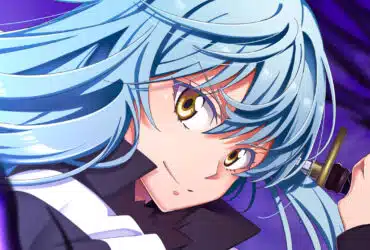

LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/de-interes/anime-grandes-fracasos/'

'Señalan estos animes como grandes fracasos'

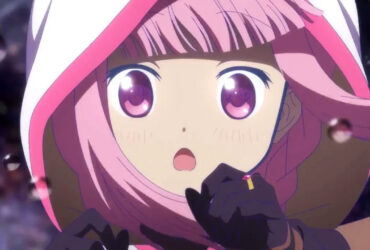

LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/de-interes/chainsaw-man-debate-manzana/'

'Esta escena de Chainsaw Man comenzó un debate en Twitter'

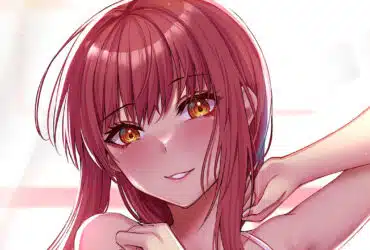

LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/noticias/konosuba-pelicula-doblaje-crunchy/'

'La película de KONOSUBA! tendrá DOBLAJE al ESPAÑOL LATINO'

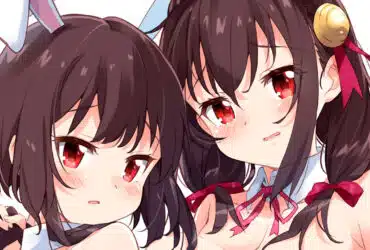

LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/de-interes/anime-mas-esperado-amazon/'

'Estos son los animes más esperados en Japón'

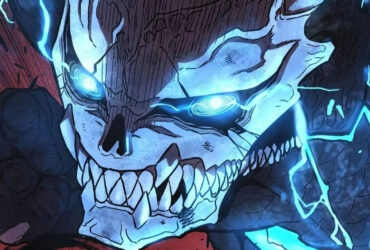

LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/noticias/tensei-kizoku-no-isekai-anime-abri/'

'Tensei Kizoku no Isekai Boukenroku anunció mes de estreno en nuevo vídeo promocional'

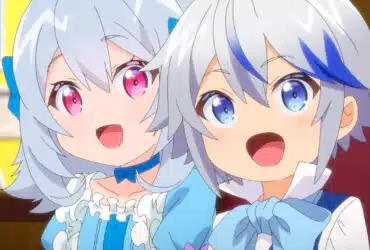

LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/noticias/ayakashi-triangle-episodios-anime/'

'El anime Ecchi Ayakashi Triangle tendrá 12 episodios'

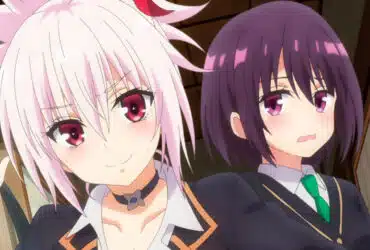

LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/noticias/level-1-dakedo-unique-julio/'

'Level 1 dakedo Unique Skill de Saikyou Desu anunció su mes de estreno en tráiler oficial'

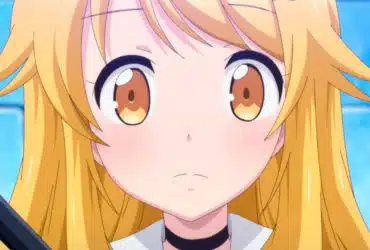

LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/de-interes/anime-invierno-2023-aburrido/'

'¿El anime de esta temporada no es interesante?'

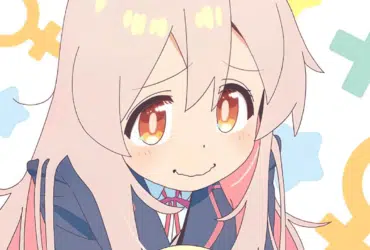

LA NOTICIA Y SU IMAGEN DE SECCION: 'ANIME'


'https://www.anmosugoi.com/noticias/46-japan-academy-film-prize-anime/'

'Los 5 animes nominados en los Japan Academy Film Prize'

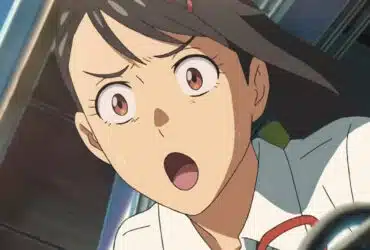

In [312]:
urele = "https://www.anmosugoi.com/noticias/anime/"
get_images(urele)

### Puedes correr un Bucle FOR usando al DEF anterior para sacar de cada seccion, tneeindo uan lista de secciones como links_secciones:

### You can run a For Boucle using the DEF above to get the images form each section by using a list of sections like links_secciones:

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/that-time-slime-filme-crunchyroll/'

'That Time I Got Reincarnated as a Slime: Scarlet Bonds obtiene nueva fecha de estreno en México'

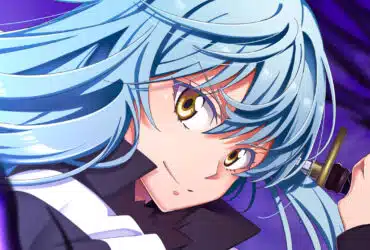

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/de-interes/anime-grandes-fracasos/'

'Señalan estos animes como grandes fracasos'

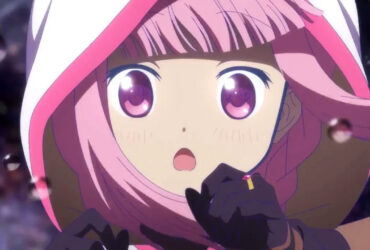

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/de-interes/chainsaw-man-debate-manzana/'

'Esta escena de Chainsaw Man comenzó un debate en Twitter'

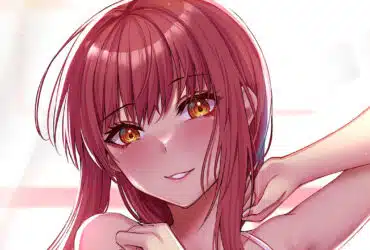

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/konosuba-pelicula-doblaje-crunchy/'

'La película de KONOSUBA! tendrá DOBLAJE al ESPAÑOL LATINO'

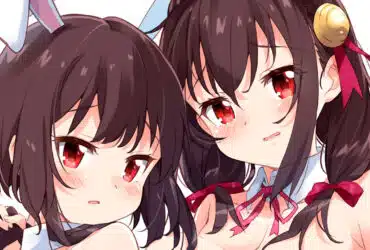

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/de-interes/anime-mas-esperado-amazon/'

'Estos son los animes más esperados en Japón'

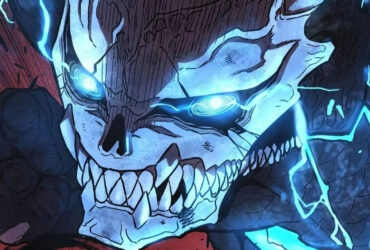

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/tensei-kizoku-no-isekai-anime-abri/'

'Tensei Kizoku no Isekai Boukenroku anunció mes de estreno en nuevo vídeo promocional'

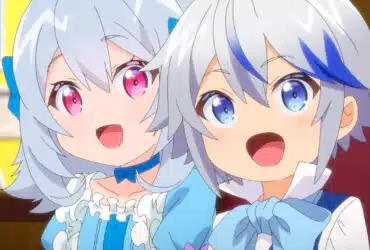

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/ayakashi-triangle-episodios-anime/'

'El anime Ecchi Ayakashi Triangle tendrá 12 episodios'

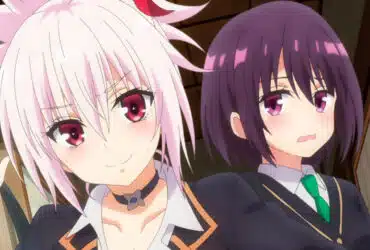

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/level-1-dakedo-unique-julio/'

'Level 1 dakedo Unique Skill de Saikyou Desu anunció su mes de estreno en tráiler oficial'

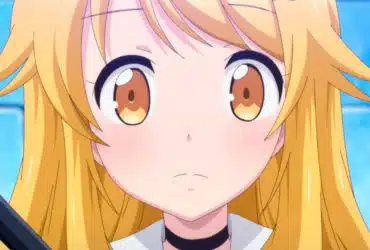

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/de-interes/anime-invierno-2023-aburrido/'

'¿El anime de esta temporada no es interesante?'

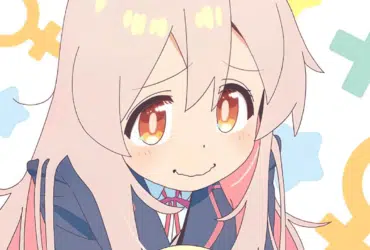

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/46-japan-academy-film-prize-anime/'

'Los 5 animes nominados en los Japan Academy Film Prize'

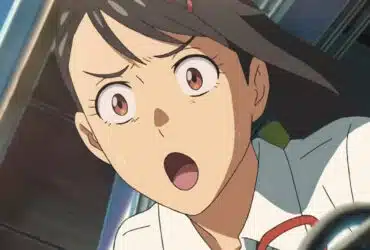

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/mushoku-tensei-maga-roxy/'

'Mushoku Tensei: El spin-off protagonizado por Roxy está por finalizar'

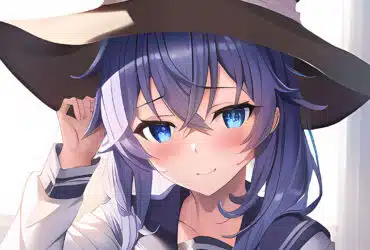

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/de-interes/bocchi-the-rock-manga-ventas/'

'El ÉXITO del anime lleva a las ventas del manga Bocchi the Rock! al siguiente nivel'

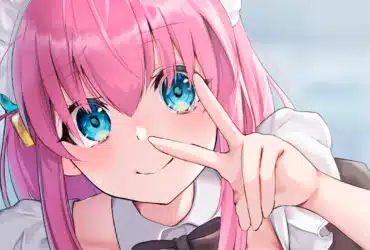

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/de-interes/kawaii-dake-ja-nai-shikimori-san-fina/'

'Kawaii Dake Ja Nai Shikimori-san podría llegar a su final'

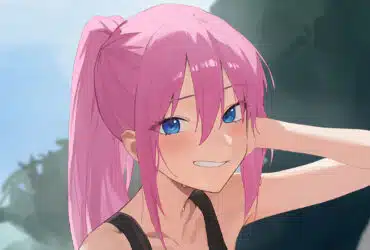

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/oshi-no-ko-manga-volumen-10/'

'El manga Oshi no Ko reveló la portada de su volumen 10'

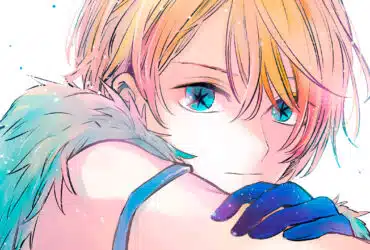

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/de-interes/one-punch-man-fubuki-y-tatsumaki-2/'

'One Punch Man: Fubuki y Tatsumaki son cada vez más «sensuales»'

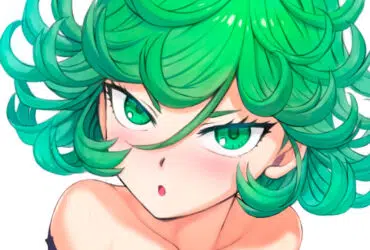

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/to-love-ru-regresa-especial/'

'To Love Ru regresa con un especial que te dejará sin aliento'

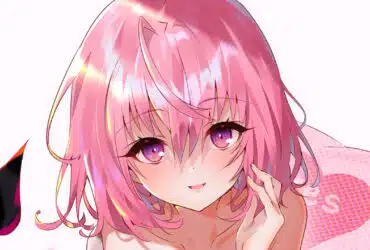

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/google-elimina-manga-explicito/'

'¡Google fuerza a las aplicaciones de Manga a eliminar el contenido explícito!'

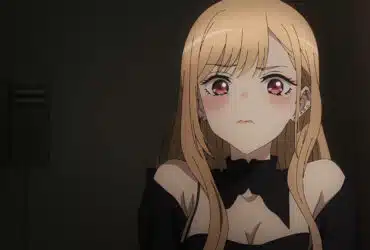

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/ijiranaide-nagatoro-san-manga-vol-15/'

'Nagatoro-san se prepara para convertirse en una obra de arte en el volumen #15'

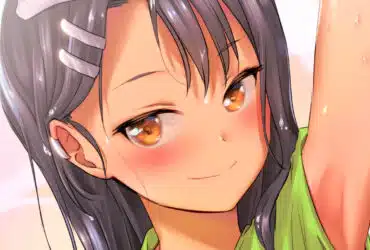

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/ayakashi-triangle-manga-vol-12/'

'Matsuri y Soga de Ayakashi Triangle protagonizan la portada del volumen 12'

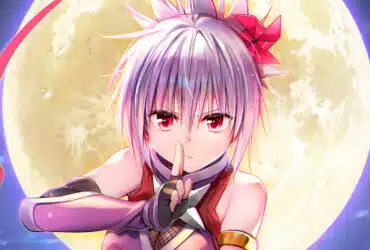

LA NOTICIA Y SU IMAGEN


'https://www.anmosugoi.com/noticias/aharen-san-manga-arco-final/'

'El manga Aharen-san wa Hakarenai entra en su arco final'

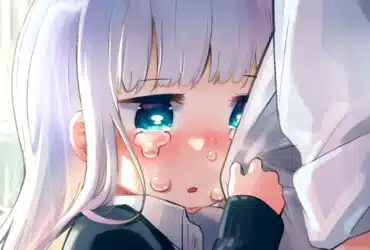

In [301]:
links_secciones2 = ['https://www.anmosugoi.com/noticias/anime/',
                    "https://www.anmosugoi.com/noticias/manga/"]
# you can get this list with one of the def declared above

for x in links_secciones2:
    get_images(x)